# **I.DESCRIPTIVE ANALYSIS OF UCI Early stage diabetes risk prediction dataset DIABETES DATASET**

In [1]:
import numpy as np
import pandas as pd 

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

sns.set(style="whitegrid")

In [4]:
df = pd.read_csv('/content/gdrive/My Drive/diabetes.csv')
df.head(3)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive


In [5]:
df.shape
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

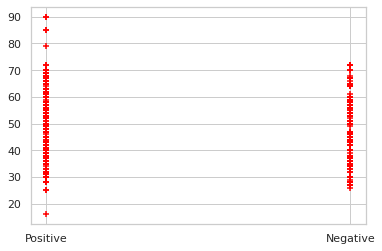

In [6]:

plt.scatter(x='class',y='Age',data=df,marker='+',color='red')

In [7]:
columns = df.columns
col = columns[1:]
col

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in col:
    df[i] = le.fit_transform(df[i])

df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [9]:
y = df['class']                     
list = ['class']
x = df.drop(list,axis = 1 )
x.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [10]:
drop_list = ['Genital thrush','Itching','Obesity','delayed healing']
x = x.drop(drop_list,axis = 1 )  
print(x.shape)
x.head()

(520, 12)


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,visual blurring,Irritability,partial paresis,muscle stiffness,Alopecia
0,40,1,0,1,0,1,0,0,0,0,1,1
1,58,1,0,0,0,1,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,0,1,1
3,45,1,0,0,1,1,1,0,0,0,0,0
4,60,1,1,1,1,1,1,1,1,1,1,1


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop('class',axis=1)


Y = df['class']

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

# **II.UNIVARIATE ANALYSIS**

In [31]:
df.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
age = np.array(df['Age'])
print(age)

[40 58 41 45 60 55 57 66 67 70 44 38 35 61 60 58 54 67 66 43 62 54 39 48
 58 32 42 52 38 53 57 41 37 54 49 48 60 63 35 30 53 50 50 35 40 48 60 60
 35 46 36 50 60 50 51 38 66 53 59 39 65 35 55 60 45 40 30 35 25 50 40 35
 65 38 50 55 48 55 39 43 35 47 50 48 35 49 38 28 68 35 45 48 40 40 36 56
 30 31 35 39 48 85 90 72 70 69 58 47 25 39 53 52 68 79 55 45 30 45 65 34
 48 35 40 47 38 55 66 57 32 48 47 43 30 16 35 66 54 58 51 40 47 62 49 53
 68 61 39 38 44 45 50 42 55 57 62 33 55 48 56 38 28 68 35 45 48 40 57 41
 37 54 49 48 60 63 35 30 53 50 50 35 40 31 35 39 48 85 90 72 70 69 58 54
 64 36 43 31 66 61 58 69 40 28 37 34 30 67 60 58 54 43 39 40 43 49 47 45
 57 72 30 27 38 43 40 55 68 29 37 30 45 47 35 32 56 50 52 26 60 65 72 30
 45 65 70 35 54 30 46 53 42 55 48 55 39 43 35 47 50 48 35 62 33 55 48 56
 38 28 68 35 45 48 40 57 47 45 57 72 30 27 38 43 40 47 45 57 72 30 27 38
 43 40 54 30 46 53 42 55 48 55 39 43 35 47 61 58 69 40 28 37 34 30 67 60
 58 54 43 33 55 36 28 34 65 34 64 44 36 43 53 47 58

In [33]:
from scipy import stats as st
from scipy.stats import skew
import pylab as p 

In [34]:
print("Mean age:       ", age.mean())
print("Standard deviation:", age.std())
print("Minimum age:    ", age.min())
print("Maximum age:    ", age.max())
print("Median:            ", np.median(age))
print("mode:",st.mode(age))

Mean age:        48.02884615384615
Standard deviation: 12.13977627056645
Minimum age:     16
Maximum age:     90
Median:             47.5
mode: ModeResult(mode=array([35]), count=array([30]))


In [35]:
print("skewness:",skew(age, axis=0, bias=True))

skewness: 0.3284085204521293


In [36]:
from scipy.stats import kurtosis
print("kurtosis",kurtosis(age, axis=0, bias=True))

kurtosis -0.201387325192099


# **III.BIVARIATE ANALYSIS**

LOGISTIC REGRESSION

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [15]:
model.fit(X_train,Y_train)

LogisticRegression()

In [16]:
X_test

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
304,69,0,1,1,1,1,0,0,1,1,1,0,0,1,0,1
332,50,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0
78,39,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
380,49,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,54,1,0,0,0,0,0,1,0,1,1,0,0,1,1,1
396,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
62,55,0,1,1,0,1,1,0,1,1,0,1,1,1,0,0


In [17]:
y_predicted = model.predict(X_test)

In [18]:
model.predict_proba(X_test)

array([[3.35092327e-03, 9.96649077e-01],
       [7.45573661e-01, 2.54426339e-01],
       [3.69765787e-04, 9.99630234e-01],
       [1.10721059e-01, 8.89278941e-01],
       [2.09243552e-03, 9.97907564e-01],
       [5.71086887e-04, 9.99428913e-01],
       [3.80145176e-04, 9.99619855e-01],
       [8.22281093e-01, 1.77718907e-01],
       [7.02191001e-01, 2.97808999e-01],
       [8.81051844e-01, 1.18948156e-01],
       [1.06881467e-02, 9.89311853e-01],
       [9.54169043e-02, 9.04583096e-01],
       [8.81051844e-01, 1.18948156e-01],
       [3.27813622e-03, 9.96721864e-01],
       [3.05582393e-03, 9.96944176e-01],
       [2.14714133e-01, 7.85285867e-01],
       [3.87315608e-01, 6.12684392e-01],
       [8.93209629e-01, 1.06790371e-01],
       [8.69699267e-01, 1.30300733e-01],
       [2.82277119e-04, 9.99717723e-01],
       [3.33969061e-03, 9.96660309e-01],
       [1.99625600e-02, 9.80037440e-01],
       [3.27813622e-03, 9.96721864e-01],
       [3.22486519e-01, 6.77513481e-01],
       [4.413810

In [19]:
model.score(X_test,Y_test)

0.9519230769230769

In [20]:
y_predicted

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0])

In [21]:
model.coef_ # model.coef_ indicates value of m in y=m*x + b equation

array([[-0.02603159, -2.59119676,  2.85535501,  3.02689126,  0.36529872,
         0.47054956,  0.66655112,  0.95067452,  0.37033885, -1.6671191 ,
         1.26438942, -0.10162269,  0.66749392, -0.33756924, -0.21542538,
        -0.2265076 ]])

In [22]:
model.intercept_ # model.intercept_ indicates value of b in y=m*x + b equation

array([1.36971579])

In [23]:
new_df = df[['Age','Polyuria']] # We only take the 'Engine HP' and 'MSRP' columns
new_df.sample(5) # Checking the random dataset sample

,Age,Polyuria
358,55,1
389,53,0
379,62,1
65,40,1
181,31,1


In [24]:
X = np.array(new_df[['Age']])
y = np.array(new_df[['Polyuria']]) 
print(X.shape) # Vewing the shape of X
print(y.shape) # Vewing the shape of y

(520, 1)
(520, 1)


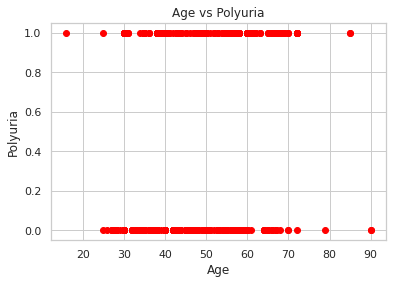

In [25]:
plt.scatter(X,y,color="red") # Plot a graph X vs y
plt.title('Age vs Polyuria')
plt.xlabel('Age')
plt.ylabel('Polyuria')
plt.show()

LINEAR REGRESSION

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=15) # Spliting into train & test dataset
regressor = LinearRegression() # Creating a regressior
regressor.fit(X_train,y_train) # Fiting the dataset into the model

LinearRegression()

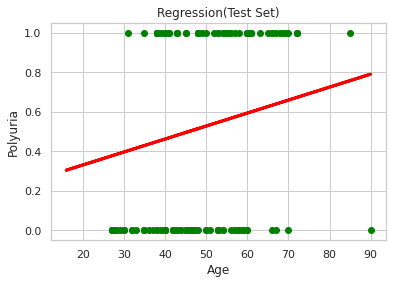

In [28]:
plt.scatter(X_test,y_test,color="green") # Plot a graph with X_test vs y_test
plt.plot(X_train,regressor.predict(X_train),color="red",linewidth=3) # Regressior line showing
plt.title('Regression(Test Set)')
plt.xlabel('Age')
plt.ylabel('Polyuria')
plt.show()

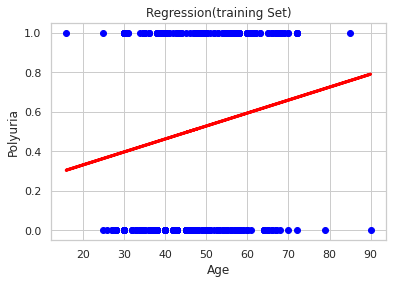

In [29]:
plt.scatter(X_train,y_train,color="blue")  # Plot a graph with X_train vs y_train
plt.plot(X_train,regressor.predict(X_train),color="red",linewidth=3) # Regressior line showing
plt.title('Regression(training Set)')
plt.xlabel('Age')
plt.ylabel('Polyuria')
plt.show()

In [30]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(X_test)
print('R2 score: %.2f' % r2_score(y_test,y_pred)) # Priniting R2 Score
print('Mean squared Error :',mean_squared_error(y_test,y_pred)) # Priniting the mean error

R2 score: 0.06
Mean squared Error : 0.23224267776780555


# **III.MULTIPLE REGRESSION ANALYSIS**

In [37]:
col


Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [38]:
cdf = df[['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class']]
cdf.head()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [39]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [41]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']])
y = np.asanyarray(train[['class']])
regr.fit(x,y)

print('Coefficients: ', regr.coef_)

Coefficients:  [[-0.23344739  0.31882073  0.28065029  0.0512693   0.02770985  0.03126834
   0.16648541  0.05147868 -0.12563742  0.15763792 -0.06556163  0.05640804
  -0.0199678  -0.01831094 -0.0402998 ]]


In [42]:
y_= regr.predict(test[['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']])
x = np.asanyarray(test[['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']])
y = np.asanyarray(test[['class']])
print('Residual sum squares: %.2f' % np.mean((y_ - y) **2 ))
print('Variance score: %.2f' % regr.score(x,y)) # Explained variance score: 1 is perfect prediction

Residual sum squares: 0.07
Variance score: 0.69


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [43]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']])
y = np.asanyarray(train[['class']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)

y_= regr.predict(test[['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']])
x = np.asanyarray(test[['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']])
y = np.asanyarray(test[['class']])

print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[-0.23344739  0.31882073  0.28065029  0.0512693   0.02770985  0.03126834
   0.16648541  0.05147868 -0.12563742  0.15763792 -0.06556163  0.05640804
  -0.0199678  -0.01831094 -0.0402998 ]]
Residual sum of squares: 0.07
Variance score: 0.69


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


# **IV,MODEL COMPRISION**


REFER PIMA..DO IT URSELF